# Exercise 1b and 2c

In [10]:
import matplotlib.pyplot as plt
import simexpal
import yaml

cfg = simexpal.config_for_dir() # load expermiments.yml

results = []
for run in cfg.collect_successful_results():  # load successfull results from output/*
    with run.open_output_file() as f:
        yml = yaml.load(f, Loader=yaml.SafeLoader)
    results.append(yml)

for r in sorted(results, key=lambda r: (r['fill_factor'], r['algo'])):
    print('Algorithm {}, fill factor {} takes: {} ms (insert), {} ms (lookup)'.format(
          r['algo'], r['fill_factor'], r['time_insert'], r['time_lookup']))

Algorithm chaining, fill factor 0.5 takes: 10861 ms (insert), 1927 ms (lookup)
Algorithm linear, fill factor 0.5 takes: 1441 ms (insert), 876 ms (lookup)
Algorithm quadratic, fill factor 0.5 takes: 1555 ms (insert), 927 ms (lookup)
Algorithm robin_hood, fill factor 0.5 takes: 1544 ms (insert), 898 ms (lookup)
Algorithm stl, fill factor 0.5 takes: 28502 ms (insert), 7219 ms (lookup)
Algorithm chaining, fill factor 0.8 takes: 19884 ms (insert), 3415 ms (lookup)
Algorithm linear, fill factor 0.8 takes: 3996 ms (insert), 2256 ms (lookup)
Algorithm quadratic, fill factor 0.8 takes: 2990 ms (insert), 1753 ms (lookup)
Algorithm robin_hood, fill factor 0.8 takes: 3092 ms (insert), 1621 ms (lookup)
Algorithm stl, fill factor 0.8 takes: 52583 ms (insert), 10823 ms (lookup)
Algorithm chaining, fill factor 0.9 takes: 21780 ms (insert), 3737 ms (lookup)
Algorithm linear, fill factor 0.9 takes: 3313 ms (insert), 1887 ms (lookup)
Algorithm quadratic, fill factor 0.9 takes: 3606 ms (insert), 2095 ms (

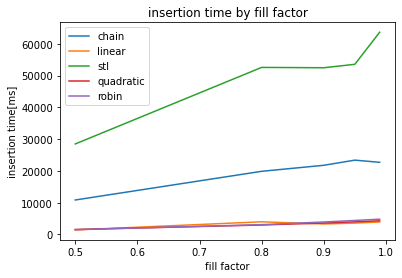

In [11]:
def vec(algo, attr):
    filtered_res = list(filter(lambda x: x['algo'] == algo, results))
    return [i[attr] for i in filtered_res]

x = vec('chaining', 'fill_factor')

# plot the insertion
plt.plot(x, vec('chaining', 'time_insert'), label = 'chain')
plt.plot(x, vec('linear', 'time_insert'), label = 'linear')
plt.plot(x, vec('stl', 'time_insert'), label = 'stl')
plt.plot(x, vec('quadratic', 'time_insert'), label = 'quadratic')
plt.plot(x, vec('robin_hood', 'time_insert'), label = 'robin')
plt.title('insertion time by fill factor')
plt.xlabel('fill factor')
plt.ylabel('insertion time[ms]')
plt.legend()
plt.savefig('insert_fill.pdf')
plt.show()

As expected, quadratic probing has a better insert than chaining for high fill factors. Quadratic probing performs quite similar to linear probing in our example. This could be due to the fact that we used '1' as a factor for instead of 1/2 as pointed out in the lecture. 

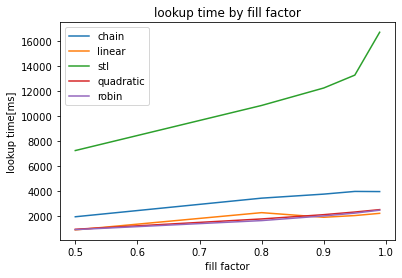

In [14]:
# plot the lookup
plt.plot(x, vec('chaining', 'time_lookup'), label = 'chain')
plt.plot(x, vec('linear', 'time_lookup'), label = 'linear')
plt.plot(x, vec('stl', 'time_lookup'), label = 'stl')
plt.plot(x, vec('quadratic', 'time_lookup'), label = 'quadratic')
plt.plot(x, vec('robin_hood', 'time_lookup'), label = 'robin')
plt.title('lookup time by fill factor')
plt.xlabel('fill factor')
plt.ylabel('lookup time[ms]')
plt.legend()
plt.savefig('lookup_fill.pdf')
plt.show()

Like in the "insert time" table, quadratic probing performs quite similar to linear probing. Chaining is slighly worse than the former but still quite comparable. We would have expected that the chaining lookup performance degrades with the load factor.

# Exercise 2b

Run the hashing program manually, using the --microbenchmark flag and a fill factor of 0.90. Use ‘perf stat‘ to monitor the number of cache misses that the chaining, linear and quadratic algorithms cause. Interpret the results: how are the results explained by the design of the algorithm?

####  Chaining:
```
❯ perf stat -e cache-misses ./hashing --microbenchmark --algo chaining --fill 0.90
```
has ~ 100 million cache misses.


#### Linear:
```
❯ perf stat -e cache-misses ./hashing --microbenchmark --algo linear --fill 0.90
```
has ~ 200 million cache misses


#### Quadratic:
```
❯ perf stat -e cache-misses ./hashing --microbenchmark --algo quadratic --fill 0.90
```
has ~ 300 million cache misses

#### Interpretation:

It is expected that the quadratic table has more cache misses than the linear table, as the probes are spread further apart and will therefore produce more cache misses. We can't explain why chaining has about half of the cache misses as linear probing. We'd expect that linear probing is better because the probe sequence is consecutive within an array. Chaining is implemented as array of pointer to the chains. Isn't it up to the OS to decide where the actuall chain links lie in memory? Maybe the OS found a way to store the chaines in a cache friendly way. 

# Exercise 3b

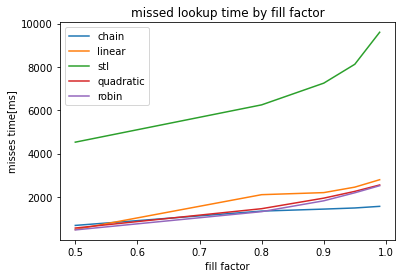

In [15]:
# plot the misses time
plt.plot(x, vec('chaining', 'time_misses'), label = 'chain')
plt.plot(x, vec('linear', 'time_misses'), label = 'linear')
plt.plot(x, vec('stl', 'time_misses'), label = 'stl')
plt.plot(x, vec('quadratic', 'time_misses'), label = 'quadratic')
plt.plot(x, vec('robin_hood', 'time_misses'), label = 'robin')
plt.title('missed lookup time by fill factor')
plt.xlabel('fill factor')
plt.ylabel('misses time[ms]')
plt.legend()
plt.savefig('misses_fill.pdf')
plt.show()

#### Questions: 
- At which fill factors does robin hood hashing outperform linear probing for unsuccessful lookups?
- By how much does performance suffer in the original benchmark?

#### Interpretation:
The robin hood implementation outperforms the linear lookup table for all measured fill factors between 0.5 and 0.99. This is expected, as the maximum psl ist stored inside the table and an unsuccesfull lookup can be terminated earlier. Compared to the original benchmark performance, the robin hood table is slightly worse, as more operations have to be performed. One would expect this behaviour for all different fill factors, which is not the case in the produced graphs. This discrepancy might be explained due to a "bad" run for  the linear table and a fill factor of 0.8. The times for insertion, lookup and misses all seem to be pretty high when compared to the other measured times. This is probably caused by a higher load factor on the used machine.